<a href="https://colab.research.google.com/github/luisespriella9/Computer-Vision-Udemy/blob/master/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get files from drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! ls 'drive/My Drive/Computer-Vision-with-Python'

00-NumPy-and-Image-Basics    06-Deep-Learning-Computer-Vision
01-Image-Basics-with-OpenCV  cvcourse_linux.yml
02-Image-Processing	     cvcourse_macos.yml
03-Video-Basics		     cvcourse_windows.yml
04-Object-Detection	     DATA


In [0]:
working_directory = 'drive/My Drive/Computer-Vision-with-Python/DATA'

In [4]:
! ls 'drive/My Drive/Computer-Vision-with-Python/DATA'

00-puppy.jpg	      flat_chessboard.png    real_chessboard.jpg
bank_note_data.txt    giraffes.jpg	     ReceiptSwiss.jpg
bricks.jpg	      gorilla.jpg	     reeses_puffs.png
car_plate.jpg	      haarcascades	     road_image.jpg
cartoon_receipt.jpg   hand_move.mp4	     sammy_face.jpg
chessboard_mat.jpg    horse.jpg		     sammy.jpg
coins_on_white.jpg    internal_external.png  sammy_noise.jpg
crossword.jpg	      lbpcascades	     separate_coins.jpg
damien_hirst_dot.jpg  Logo.jpg		     solvay_conference.jpg
Denis_Mukwege.jpg     lucky_charms.jpg	     sudoku.jpg
dog_backpack.jpg      many_cereals.jpg	     uspassport.jpg
dog_backpack.png      Nadia_Murad.jpg	     video_capture.mp4
dot_grid.png	      overlap_coins.jpg      watermark_no_copy.png
finger_move.mp4       pennies.jpg	     wood_detail.jpg
five_shapes.PNG       rainbow.jpg


Import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

Color Mapping

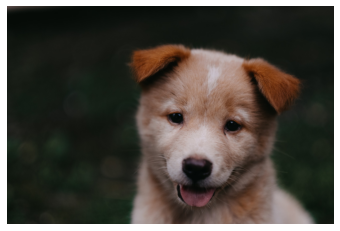

In [6]:
image_path = working_directory+'/00-puppy.jpg'
img = cv2.imread(image_path)
# transform to right color channel
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()

Blending Images

In [0]:
img1 = cv2.imread(working_directory+'/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(working_directory+'/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

shape:  (1401, 934, 3)


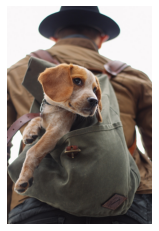

In [8]:
print("shape: ", img1.shape)
plt.axis('off')
plt.imshow(img1)
plt.show()

shape:  (1280, 1277, 3)


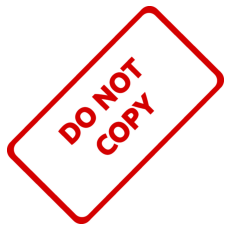

In [9]:
print("shape: ", img2.shape)
plt.axis('off')
plt.imshow(img2)
plt.show()

shape:  (1200, 1200, 3)


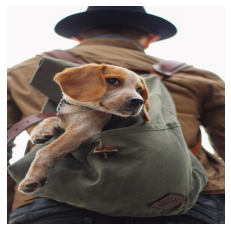

shape:  (1200, 1200, 3)


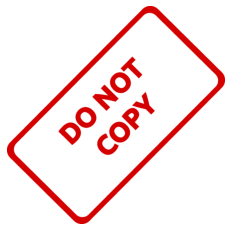

In [10]:
# blend same size images
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))
print("shape: ", img1.shape)
plt.axis('off')
plt.imshow(img1)
plt.show()
print("shape: ", img2.shape)
plt.axis('off')
plt.imshow(img2)
plt.show()

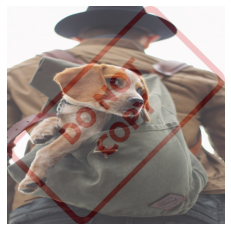

In [11]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=0)
plt.axis('off')
plt.imshow(blended)
plt.show()

overlay small image on top of larger image


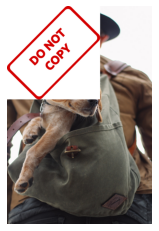

blend together images of different sizes


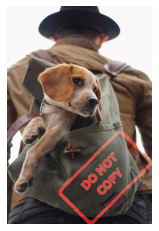

In [12]:
# overlay images with different sizes

img1 = cv2.imread(working_directory+'/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(working_directory+'/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# first, overlay small image on top of larger image (no blending)
print("overlay small image on top of larger image")
img2_small = cv2.resize(img2, dsize=(600, 600))
x_offset = 0
y_offset = 0
x_end = x_offset + img2_small.shape[1]
y_end = y_offset + img2_small.shape[0]

large_img = img1
large_img[y_offset:y_end, x_offset:x_end] = img2_small 

plt.axis('off')
plt.imshow(large_img)
plt.show()

# blend together images of different sizes

img1 = cv2.imread(working_directory+'/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(working_directory+'/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2_small = cv2.resize(img2, dsize=(600, 600))
# center given offset
x_offset = img1.shape[1]-img2_small.shape[1]
y_offset = img1.shape[0]-img2_small.shape[0]
x_end = img1.shape[1]
y_end = img1.shape[0]

rows, cols, channels = img2_small.shape
roi = img1[y_offset:y_end, x_offset:x_end, :]
img2_small_gray = cv2.cvtColor(img2_small, cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(img2_small_gray)
white_background = np.full(shape=(600, 600, 3), fill_value=255, dtype=np.uint8)
background = cv2.bitwise_or(src1=white_background, src2=white_background, mask=mask_inv)
foreground = cv2.bitwise_or(src1=img2_small, src2=img2_small, mask=mask_inv)
final_roi = cv2.bitwise_or(roi, foreground)
large_img = img1
large_img[y_offset:y_offset+final_roi.shape[0], x_offset:x_offset+final_roi.shape[1]] = final_roi

print("blend together images of different sizes")
plt.axis('off')
plt.imshow(large_img)
plt.show()

Image Thresholding

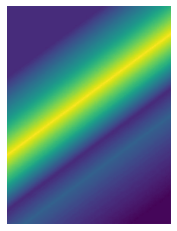

In [13]:
rainbow_img = cv2.imread(working_directory+'/rainbow.jpg', 0)
plt.axis('off')
plt.imshow(rainbow_img)
plt.show()

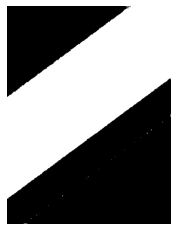

In [14]:
ret, thresh1 = cv2.threshold(rainbow_img, int(255/2), 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(thresh1, cmap='gray')
plt.show()

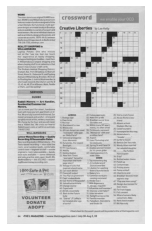

In [15]:
crossword_img = cv2.imread(working_directory+'/crossword.jpg', 0)
plt.axis('off')
plt.imshow(crossword_img, cmap='gray')
plt.show()

In [0]:
def show_pic(img):
  fig = plt.figure(figsize=(15, 15))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  plt.axis('off')

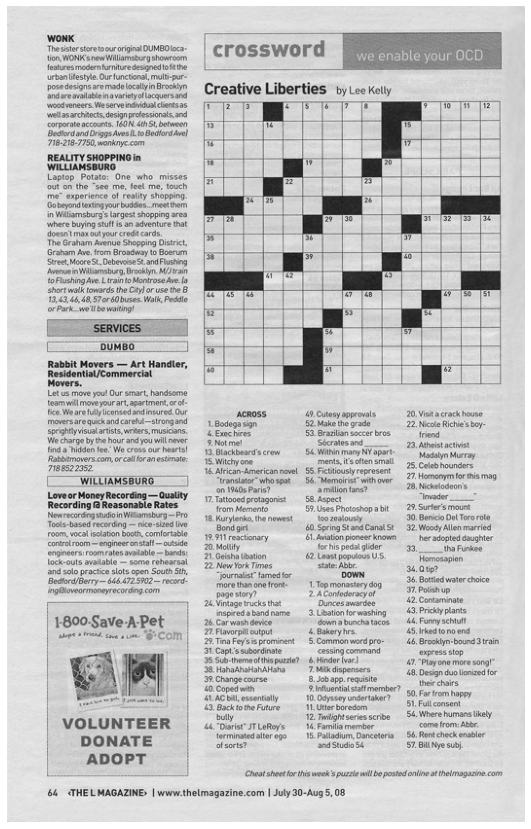

In [17]:
show_pic(crossword_img)

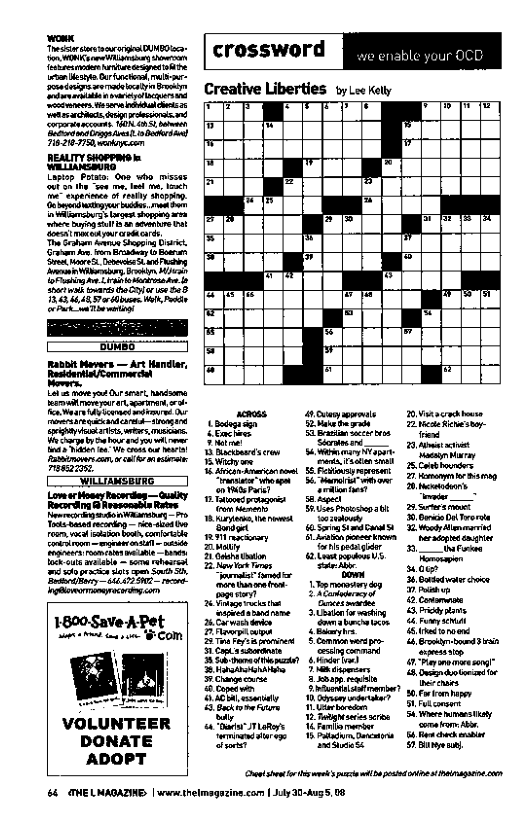

In [18]:
ret, th_crossword = cv2.threshold(crossword_img, 180, 255, cv2.THRESH_BINARY)
show_pic(th_crossword)

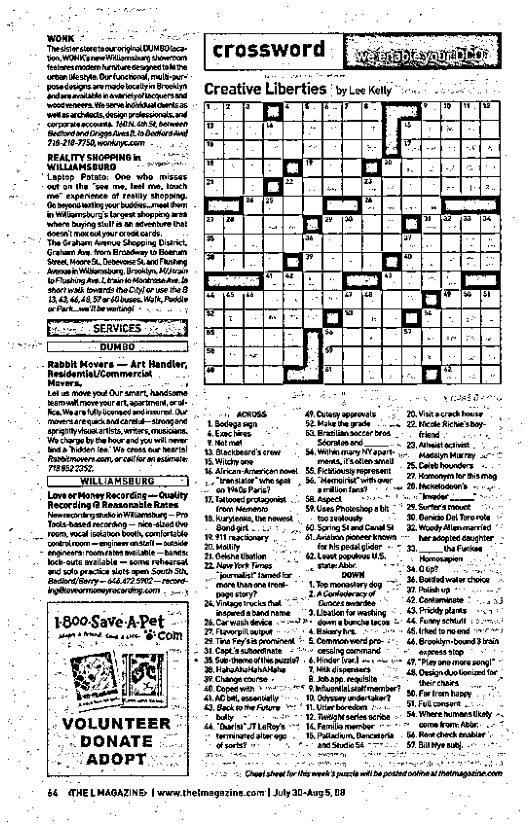

In [19]:
th2_crossword = cv2.adaptiveThreshold(crossword_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
show_pic(th2_crossword)

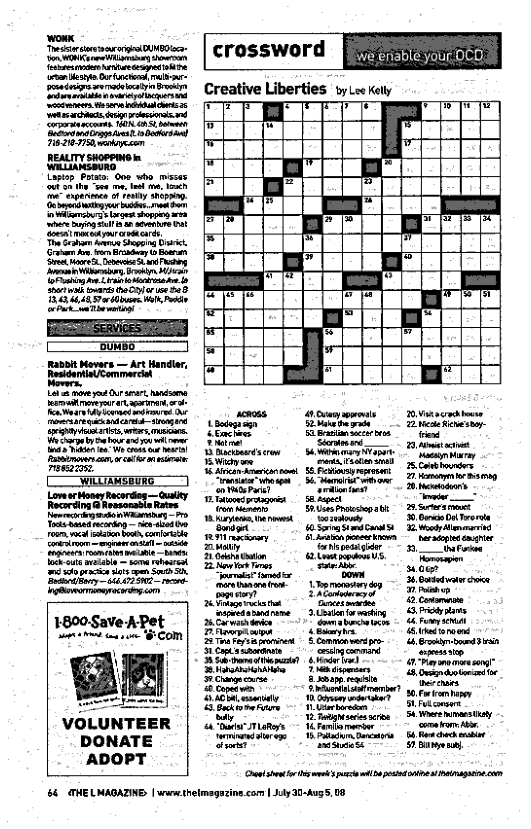

In [20]:
blended = cv2.addWeighted(src1=th_crossword, alpha=0.6, src2=th2_crossword, beta=0.4, gamma=0)
show_pic(blended)